In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV as gs

In [7]:
df = pd.read_csv('./train_data.csv')

In [8]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
df.shape

(614, 13)

In [10]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [11]:
df.size

7982

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
(df.isna().sum().sum()/df.size)*100

1.8667000751691305

In [19]:
got = df[df['Loan_Status'] == 'Y']
not_got = df[df['Loan_Status'] == 'N']

In [20]:
got.shape

(422, 13)

In [21]:
not_got.shape

(192, 13)

In [22]:
import seaborn as sns

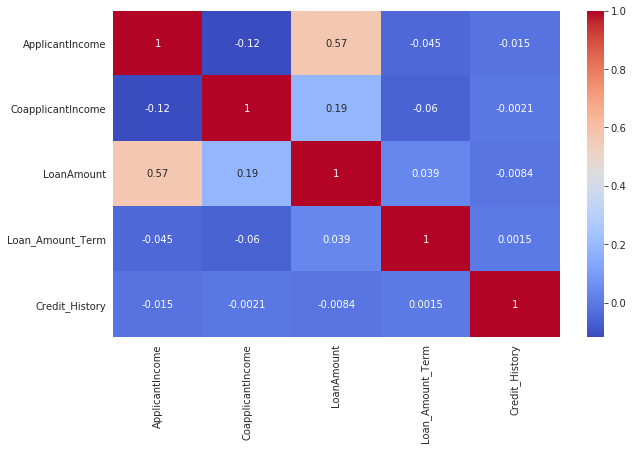

In [23]:
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
got['Credit_History'].fillna(1.0, inplace = True, limit = 36)
got['Credit_History'].fillna(0.0, inplace = True)

In [28]:
got['Self_Employed'].value_counts()

No     343
Yes     56
Name: Self_Employed, dtype: int64

In [30]:
got['Self_Employed'].fillna('No', inplace = True, limit = 20)
got['Self_Employed'].fillna('Yes', inplace = True)

In [33]:
got['Gender'].fillna('Male', inplace = True, limit = 6)
got['Gender'].fillna('Female', inplace = True, limit = 2)

In [34]:
got['Dependents'].fillna('0',inplace=True,limit=5)
got['Dependents'].fillna('1',inplace=True,limit=2)
got['Dependents'].fillna('3+',inplace=True,limit=2)

In [35]:
got['Married'].fillna('Yes',inplace=True,limit=2)
got['Dependents'].fillna('No',inplace=True,limit=1)

In [36]:
got['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [37]:
got['LoanAmount'].fillna(got['LoanAmount'].median(),inplace=True)

In [38]:
not_got.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            6
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           11
Loan_Amount_Term      6
Credit_History       13
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
not_got['Credit_History'].fillna(1.0,inplace=True,limit=7)
not_got['Credit_History'].fillna(0.0,inplace=True,limit=6)
not_got['Loan_Amount_Term'].fillna(360.0,inplace=True)
not_got['LoanAmount'].fillna(not_got['LoanAmount'].median(),inplace=True)
not_got['Gender'].fillna('Male',inplace=True,limit=4)
not_got['Gender'].fillna('Female',inplace=True,limit=1)
not_got['Self_Employed'].fillna('No',inplace=True,limit=7)
not_got['Self_Employed'].fillna('Yes',inplace=True,limit=2)
not_got['Dependents'].fillna('0',inplace=True,limit=4)
not_got['Dependents'].fillna('2',inplace=True,limit=2)


In [42]:
df1 = pd.concat([got, not_got])

In [43]:
df2 = df1.sample(frac=1)

In [44]:
cat = df2.select_dtypes(exclude=np.number)

In [45]:
cat.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
63,LP001213,Male,Yes,1,Graduate,No,Rural,N
374,LP002209,Female,No,0,Graduate,1,Urban,Y
383,LP002234,Male,No,0,Graduate,Yes,Urban,Y
46,LP001138,Male,Yes,1,Graduate,No,Urban,Y
602,LP002953,Male,Yes,3+,Graduate,No,Urban,Y
356,LP002149,Male,Yes,2,Graduate,No,Rural,Y
348,LP002137,Male,Yes,0,Graduate,No,Semiurban,Y
377,LP002223,Male,Yes,0,Graduate,No,Semiurban,Y
553,LP002788,Male,Yes,0,Not Graduate,No,Urban,N
442,LP002418,Male,No,3+,Not Graduate,No,Semiurban,Y


In [47]:
cat.isna().sum()

Loan_ID          0
Gender           0
Married          1
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [51]:
cat.drop('Loan_ID',inplace=True,axis=1)

KeyError: "['Loan_ID'] not found in axis"

In [52]:
data=pd.get_dummies(cat,drop_first=True)

In [53]:
data.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_1.0,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
63,1,1,1,0,0,0,0,1,0,0,0,0
374,0,0,0,0,0,0,1,0,0,0,1,1
383,1,0,0,0,0,0,0,0,1,0,1,1
46,1,1,1,0,0,0,0,1,0,0,1,1
602,1,1,0,0,1,0,0,1,0,0,1,1


In [54]:
df2.drop('Loan_ID',inplace=True,axis=1)
num=df2.select_dtypes(include=np.number)

In [55]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
63,4945,0.0,129.0,360.0,0.0
374,2764,1459.0,110.0,360.0,1.0
383,7167,0.0,128.0,360.0,1.0
46,5649,0.0,44.0,360.0,1.0
602,5703,0.0,128.0,360.0,1.0


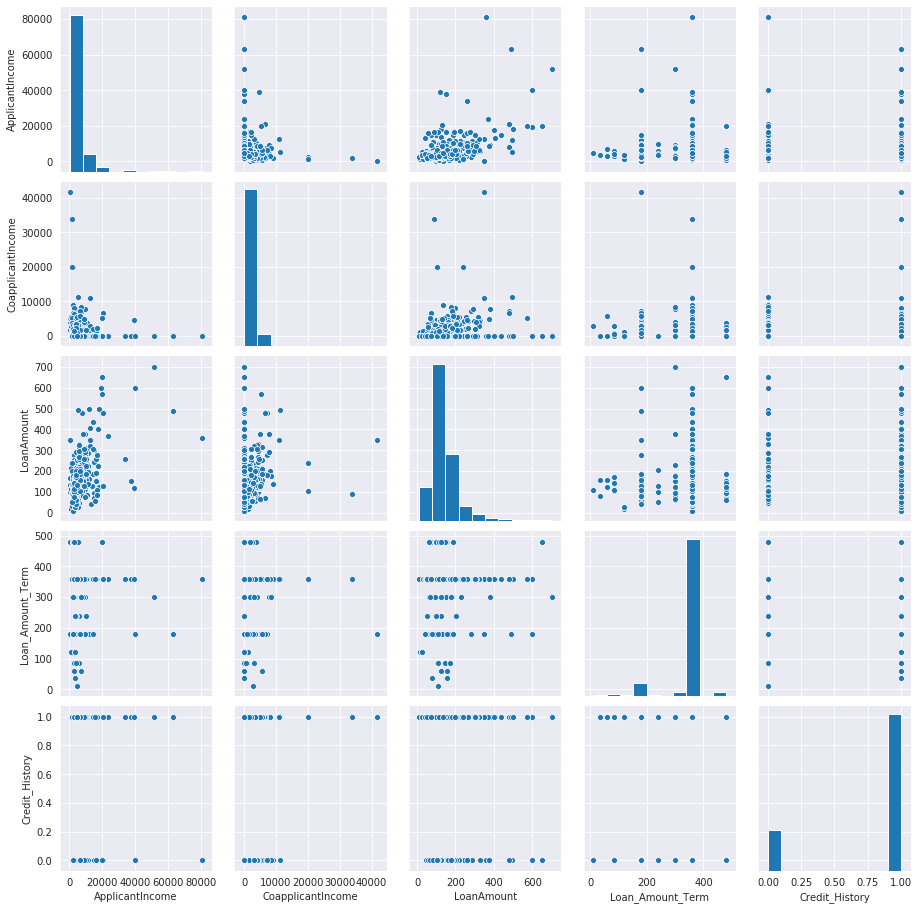

In [56]:
sns.set_style('darkgrid')
sns.pairplot(num,palette='green',markers='o')

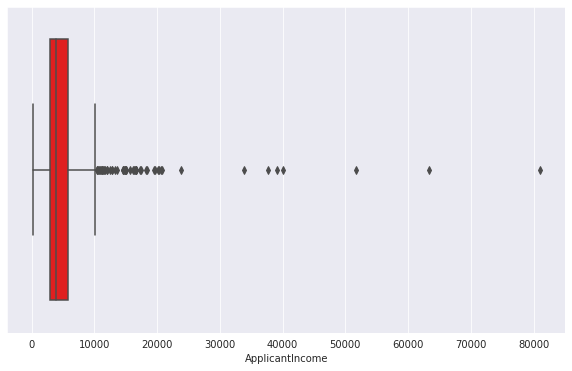

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(num['ApplicantIncome'],color='red')

In [59]:
from scipy import stats 
df4 =  num[(np.abs(stats.zscore(num))<3).all(axis = 1)]

In [60]:
df.shape

(614, 13)

In [61]:
final_df = pd.concat([df4,data],axis = 1)

In [62]:
final_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_1.0,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,126.0,360.0,1.0,1,0,0,0,0,0,0,1,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,1,0,0,1,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,0,0,1,1


In [64]:
final_df.dropna(inplace=True)

In [65]:
final_df.shape

(577, 17)

In [68]:
x=final_df.drop("Loan_Status_Y",axis=1)
y=final_df["Loan_Status_Y"]

In [71]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [73]:
model = lr()

In [74]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
pred = model.predict(x_test)

In [77]:
pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1], dtype=uint8)

In [78]:
accuracy_score(pred, y_test)

0.7931034482758621

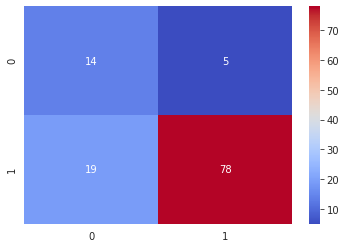

In [80]:
sns.heatmap(cm(pred,y_test),annot=True,cmap="coolwarm")

In [81]:
print(cr(pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.74      0.54        19
           1       0.94      0.80      0.87        97

    accuracy                           0.79       116
   macro avg       0.68      0.77      0.70       116
weighted avg       0.86      0.79      0.81       116



In [84]:
from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'filename.pkl')
 
# Load the model from the file
model_from_joblib = joblib.load('filename.pkl')
 
# Use the loaded model to make predictions
model_from_joblib.predict(x_test)

/home/lenovo/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1], dtype=uint8)